In [7]:
# initialize the black jack environment for rl 

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('Blackjack-v1', natural=True)

print("Observation Space:", env.observation_space)
print("Action Space:", env.action_space)

Observation Space: Tuple(Discrete(32), Discrete(11), Discrete(2))
Action Space: Discrete(2)


## Q-Learning

Batch 1: Mean Return = -0.06
Batch 2: Mean Return = -0.17
Batch 3: Mean Return = -0.26
Batch 4: Mean Return = -0.02
Batch 5: Mean Return = -0.21
Batch 6: Mean Return = -0.12
Batch 7: Mean Return = -0.07
Batch 8: Mean Return = -0.25
Batch 9: Mean Return = -0.14
Batch 10: Mean Return = -0.15
Batch 11: Mean Return = -0.16
Batch 12: Mean Return = -0.01
Batch 13: Mean Return = -0.16
Batch 14: Mean Return = -0.2
Batch 15: Mean Return = -0.12
Batch 16: Mean Return = -0.26
Batch 17: Mean Return = -0.24
Batch 18: Mean Return = -0.15
Batch 19: Mean Return = 0.09
Batch 20: Mean Return = -0.04
Batch 21: Mean Return = -0.01
Batch 22: Mean Return = -0.06
Batch 23: Mean Return = -0.02
Batch 24: Mean Return = -0.12
Batch 25: Mean Return = -0.08
Batch 26: Mean Return = -0.18
Batch 27: Mean Return = -0.19
Batch 28: Mean Return = -0.24
Batch 29: Mean Return = -0.18
Batch 30: Mean Return = -0.04
Batch 31: Mean Return = -0.09
Batch 32: Mean Return = -0.22
Batch 33: Mean Return = -0.12
Batch 34: Mean Return

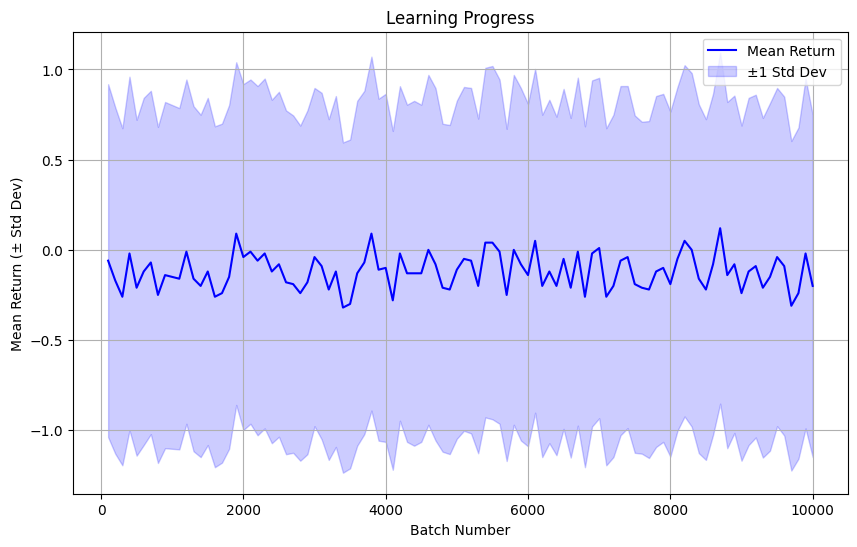

In [9]:
# Adjusted Q-table dimensions based on state space ranges
Q = np.zeros((28, 10, 2, 2))  # (player_sum 4-31, dealer_card 1-10, usable_ace, action)

# Hyperparameters
alpha = 0.1   # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1 # Exploration rate
num_episodes = 10000
batch_size = 100

def choose_action(state):
    player_sum, dealer_card, usable_ace = state
    # Adjust indices to match Q-table dimensions
    player_idx = player_sum - 4
    dealer_idx = dealer_card - 1
    ace_idx = int(usable_ace)

    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(Q[player_idx, dealer_idx, ace_idx])  # Exploit

# Function to update Q-table
def update_q_table(state, action, reward, next_state, done):
    player_sum, dealer_card, usable_ace = state
    next_player_sum, next_dealer_card, next_usable_ace = next_state

    # Adjust indices to match Q-table dimensions
    player_idx = player_sum - 4
    dealer_idx = dealer_card - 1
    ace_idx = int(usable_ace)

    next_player_idx = next_player_sum - 4
    next_dealer_idx = next_dealer_card - 1
    next_ace_idx = int(next_usable_ace)

    if not done:
        best_next_action = np.argmax(Q[next_player_idx, next_dealer_idx, next_ace_idx])
        td_target = reward + gamma * Q[next_player_idx, next_dealer_idx, next_ace_idx, best_next_action]
    else:
        td_target = reward  # No future reward if the episode is done

    td_error = td_target - Q[player_idx, dealer_idx, ace_idx, action]
    Q[player_idx, dealer_idx, ace_idx, action] += alpha * td_error

total_rewards = []

# Q-learning algorithm
for episode in range(num_episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = choose_action(state)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        update_q_table(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

    total_rewards.append(total_reward)

    # Track mean return every batch_size episodes
    if (episode + 1) % batch_size == 0:
        mean_return = np.mean(total_rewards[-batch_size:])
        print(f"Batch {episode // batch_size + 1}: Mean Return = {mean_return}")

mean_returns = [np.mean(total_rewards[i - batch_size:i]) for i in range(batch_size, num_episodes + 1, batch_size)]
stddev_returns = [np.std(total_rewards[i - batch_size:i]) for i in range(batch_size, num_episodes + 1, batch_size)]

plt.figure(figsize=(10, 6))
plt.plot(range(batch_size, num_episodes + 1, batch_size), mean_returns, label='Mean Return', color='blue')
plt.fill_between(range(batch_size, num_episodes + 1, batch_size),
                 np.array(mean_returns) - np.array(stddev_returns),
                 np.array(mean_returns) + np.array(stddev_returns),
                 color='blue', alpha=0.2, label='±1 Std Dev')

plt.xlabel('Batch Number')
plt.ylabel('Mean Return (± Std Dev)')
plt.title('Learning Progress')
plt.legend()
plt.grid(True)
plt.show()

## Monte Carlo Control

Episode 50000: Mean Return = -0.3519, Epsilon = 0.77880
Episode 100000: Mean Return = -0.2832, Epsilon = 0.60653
Episode 150000: Mean Return = -0.2350, Epsilon = 0.47237
Episode 200000: Mean Return = -0.1922, Epsilon = 0.36788
Episode 250000: Mean Return = -0.1674, Epsilon = 0.28650
Episode 300000: Mean Return = -0.1386, Epsilon = 0.22313
Episode 350000: Mean Return = -0.1227, Epsilon = 0.17377
Episode 400000: Mean Return = -0.1215, Epsilon = 0.13533
Episode 450000: Mean Return = -0.1019, Epsilon = 0.10540
Episode 500000: Mean Return = -0.0889, Epsilon = 0.08208
Episode 550000: Mean Return = -0.0840, Epsilon = 0.06393
Episode 600000: Mean Return = -0.0890, Epsilon = 0.05000
Episode 650000: Mean Return = -0.0819, Epsilon = 0.05000
Episode 700000: Mean Return = -0.0835, Epsilon = 0.05000
Episode 750000: Mean Return = -0.0771, Epsilon = 0.05000
Episode 800000: Mean Return = -0.0759, Epsilon = 0.05000
Episode 850000: Mean Return = -0.0733, Epsilon = 0.05000
Episode 900000: Mean Return = -0

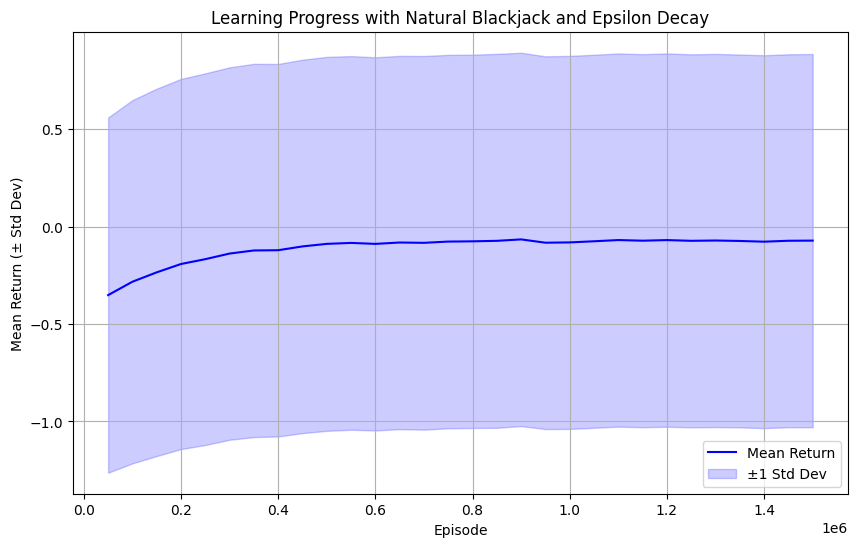

<Figure size 640x480 with 0 Axes>

In [15]:
env = gym.make('Blackjack-v1', natural=True)

# Initialize empty dictionaries for Q-values and returns
Q = {}
returns_sum = {}
returns_count = {}

# Function to get the Q-value for a state-action pair
def get_Q(state, action):
    return Q.get((state, action), 0.0)

# Policy function (epsilon-greedy with decay)
def policy(state, epsilon):
    actions = [0, 1]  # Stick or Hit
    if np.random.rand() < epsilon:
        return np.random.choice(actions)
    else:
        # Choose the action with the highest Q-value
        q_values = [get_Q(state, a) for a in actions]
        max_q = max(q_values)
        # Handle the case where multiple actions have the same Q-value
        best_actions = [a for a in actions if get_Q(state, a) == max_q]
        return np.random.choice(best_actions)

# Hyperparameters
num_episodes = 1500000
initial_epsilon = 1.0  # Start with high exploration
min_epsilon = 0.05     # Minimum exploration rate
epsilon_decay = 0.999995  # Decay rate
batch_size = 50000

epsilon = initial_epsilon
total_rewards = []
mean_returns = []

for episode in range(1, num_episodes + 1):
    # Generate an episode
    episode_states_actions_rewards = []
    state, _ = env.reset()
    done = False

    while not done:
        action = policy(state, epsilon)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        episode_states_actions_rewards.append((state, action, reward))
        state = next_state

    total_reward = sum([r for (_, _, r) in episode_states_actions_rewards])
    total_rewards.append(total_reward)

    # Get unique state-action pairs in the episode
    state_action_pairs = set([(s, a) for (s, a, _) in episode_states_actions_rewards])

    for state_action in state_action_pairs:
        sa_index = next(i for i, x in enumerate(episode_states_actions_rewards) if x[0] == state_action[0] and x[1] == state_action[1])
        # Calculate the return (G) from the first occurrence of the state-action pair
        G = sum([x[2] * (1) ** i for i, x in enumerate(episode_states_actions_rewards[sa_index:])])
        # Update returns_sum and returns_count
        returns_sum[state_action] = returns_sum.get(state_action, 0.0) + G
        returns_count[state_action] = returns_count.get(state_action, 0.0) + 1.0
        # Update Q-value
        Q[state_action] = returns_sum[state_action] / returns_count[state_action]

    # Decay epsilon after each episode
    if epsilon > min_epsilon:
        epsilon *= epsilon_decay
    else:
        epsilon = min_epsilon

    # Track mean return every batch_size episodes
    if episode % batch_size == 0:
        mean_return = np.mean(total_rewards[-batch_size:])
        mean_returns.append(mean_return)
        print(f"Episode {episode}: Mean Return = {mean_return:.4f}, Epsilon = {epsilon:.5f}")

# Calculate mean and standard deviation of returns for plotting
mean_returns = [np.mean(total_rewards[i - batch_size:i]) for i in range(batch_size, num_episodes + 1, batch_size)]
stddev_returns = [np.std(total_rewards[i - batch_size:i]) for i in range(batch_size, num_episodes + 1, batch_size)]

plt.figure(figsize=(10, 6))
plt.plot(range(batch_size, num_episodes + 1, batch_size), mean_returns, label='Mean Return', color='blue')
plt.fill_between(range(batch_size, num_episodes + 1, batch_size),
                 np.array(mean_returns) - np.array(stddev_returns),
                 np.array(mean_returns) + np.array(stddev_returns),
                 color='blue', alpha=0.2, label='±1 Std Dev')

plt.xlabel('Episode')
plt.ylabel('Mean Return (± Std Dev)')
plt.title('Learning Progress with Natural Blackjack and Epsilon Decay')
plt.legend()
plt.grid(True)
plt.show()
# save the last graph 
plt.savefig('black_jack_rl_graph_v2.png')